**Sentiment Analysis final project**  
Group members:  
*   Jashwanth Badapatla
*   Stephany Monterroza  
*   Carlos Vasconez
*   Steve Velez







In [1]:
#importing the necesary libraries
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
plt.style.use('ggplot')

In [2]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/data/reviews.csv') #csv is in my google drive
print(df.shape)

(118, 3)


In [3]:
df.head(3) # the Raing column has to be modified and just leave the number

,Name,Comment,Rating
0,William Thomas,Very Difficult to pass in Lambton College in M...,1 star
1,Amal M,Lambton College in Mississauga provided me wit...,5 stars
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5 stars


In [4]:
df['Rating'] = df['Rating'].str.extract('(\d+)').astype(int) # extract only the numeric part of the column


In [5]:
df.head(3)

,Name,Comment,Rating
0,William Thomas,Very Difficult to pass in Lambton College in M...,1
1,Amal M,Lambton College in Mississauga provided me wit...,5
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5


**EDA**

In [6]:
df.Rating.value_counts().sort_index()#here we can see the number of times each score occurs, in order

1    32
2     4
3     8
4    17
5    57
Name: Rating, dtype: int64

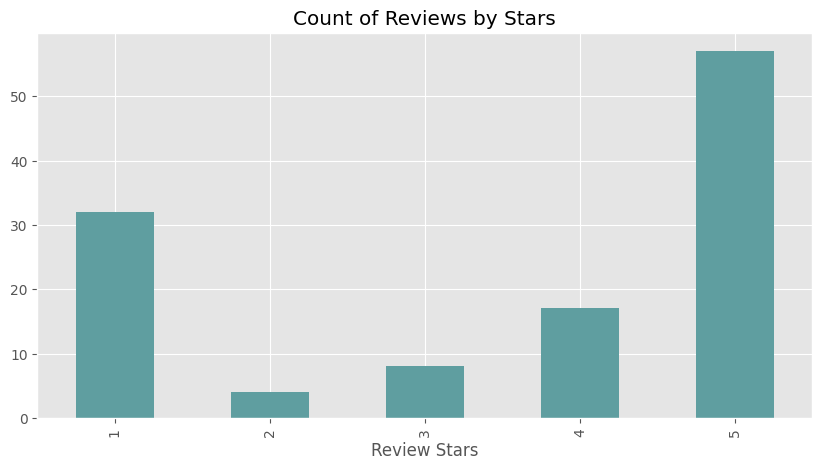

In [7]:
reviews_dist = df.Rating.value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5), color='cadetblue')
reviews_dist.set_xlabel('Review Stars')
plt.show()

In [8]:
df.Comment.duplicated() # 1 duplicate comment. Two comments say "Nice". So, it's fine

0      False
1      False
2      False
3      False
4      False
       ...  
113    False
114     True
115    False
116    False
117    False
Name: Comment, Length: 118, dtype: bool

In [9]:
print(df.Comment[50])

I have completed my graduation in 2017 (B.A- English literature-52%) i have a 3 years work experience my IELTS score overall 6.5 - which course I am eligible please suggest me  September  2022


**Text normalization:** Lower-casing, romeving punctuations, special characters, stop words.

In [10]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.3 MB/s eta 0:00:00


In [11]:
import emoji

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Define a function to handle emojis
def handle_emojis(text):
    # Translate each emoji to text
    text = emoji.demojize(text)
    return text

# Define a text normalization function
def normalize_text(text):
    # Handle emojis
    text = handle_emojis(text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers (keeping emojis)
    text = re.sub(r'[^a-zA-Z\s:]', '', text)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Lemmatization and removing stop words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    normalized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

    return normalized_text

# Assuming 'df' is your DataFrame and 'Comment' is the column
# Apply the normalization function to the Comment column
df['Normalized_Comment'] = df['Comment'].apply(normalize_text)

# Display the first few rows of the DataFrame to check the results
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Name,Comment,Rating,Normalized_Comment
0,William Thomas,Very Difficult to pass in Lambton College in M...,1,difficult pas lambton college mississauga camp...
1,Amal M,Lambton College in Mississauga provided me wit...,5,lambton college mississauga provided exception...
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5,lambton college mississauga simply exceptional...
3,Rajat Sharma,It was an awesome and fruitful experience grad...,5,awesome fruitful experience graduating college...
4,savraj singh,I am student at Lambton college it is excellen...,5,student lambton college excellent also cafeter...


In [12]:
df.Comment[0]#First comment with an emoji

"Very Difficult to pass in Lambton College in Mississauga Campus especially in the subject of Krishna Kiruba 😨\n3 invigilators come when he conduct Test in Lockdown Browser and they are very Strict you are not allowed to turn your head even left or  Right also. Only Your eyes in your laptop during exam.\nThis makes burden on students in his subject and create depression among them.\nAs a international student it's very difficult as they manage study, Work, Grocery, prepare food, Wash Cloths etc by themself no one here to help them.\nSo, Not recommend this college."

In [13]:
df.Normalized_Comment[0] # the same first comment but with the 'translated' emoji

'difficult pas lambton college mississauga campus especially subject krishna kiruba : fearfulface : invigilator come conduct test lockdown browser strict allowed turn head even left right also eye laptop exam make burden student subject create depression among international student difficult manage study work grocery prepare food wash cloth etc themself one help recommend college'

In [14]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply the function to your DataFrame
df['Sentiment_Scores'] = df['Normalized_Comment'].apply(get_sentiment_scores)

# Now df['Sentiment_Scores'] contains the sentiment scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
df.head(5)

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores
0,William Thomas,Very Difficult to pass in Lambton College in M...,1,difficult pas lambton college mississauga camp...,"{'neg': 0.182, 'neu': 0.704, 'pos': 0.114, 'co..."
1,Amal M,Lambton College in Mississauga provided me wit...,5,lambton college mississauga provided exception...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp..."
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5,lambton college mississauga simply exceptional...,"{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp..."
3,Rajat Sharma,It was an awesome and fruitful experience grad...,5,awesome fruitful experience graduating college...,"{'neg': 0.032, 'neu': 0.607, 'pos': 0.361, 'co..."
4,savraj singh,I am student at Lambton college it is excellen...,5,student lambton college excellent also cafeter...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp..."


In [16]:
df['neg'] = df['Sentiment_Scores'].apply(lambda x: x.get('neg', 0))
df['neu'] = df['Sentiment_Scores'].apply(lambda x: x.get('neu', 0))
df['pos'] = df['Sentiment_Scores'].apply(lambda x: x.get('pos', 0))
df['compound'] = df['Sentiment_Scores'].apply(lambda x: x.get('compound', 0))


In [17]:
df.head()

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound
0,William Thomas,Very Difficult to pass in Lambton College in M...,1,difficult pas lambton college mississauga camp...,"{'neg': 0.182, 'neu': 0.704, 'pos': 0.114, 'co...",0.182,0.704,0.114,-0.6486
1,Amal M,Lambton College in Mississauga provided me wit...,5,lambton college mississauga provided exception...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.000,0.672,0.328,0.9950
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5,lambton college mississauga simply exceptional...,"{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp...",0.000,0.471,0.529,0.9741
3,Rajat Sharma,It was an awesome and fruitful experience grad...,5,awesome fruitful experience graduating college...,"{'neg': 0.032, 'neu': 0.607, 'pos': 0.361, 'co...",0.032,0.607,0.361,0.9081
4,savraj singh,I am student at Lambton college it is excellen...,5,student lambton college excellent also cafeter...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.000,0.575,0.425,0.9595


In [18]:
df.columns

Index(['Name', 'Comment', 'Rating', 'Normalized_Comment', 'Sentiment_Scores',
       'neg', 'neu', 'pos', 'compound'],
      dtype='object')

**Ploting the VADER results:** With this, we want to see if the rating match the sentiment from the comments.

<ipython-input-19-be68fa67b742>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='Rating', y='compound', data=df, ci='sd', palette='coolwarm', capsize=0.1)


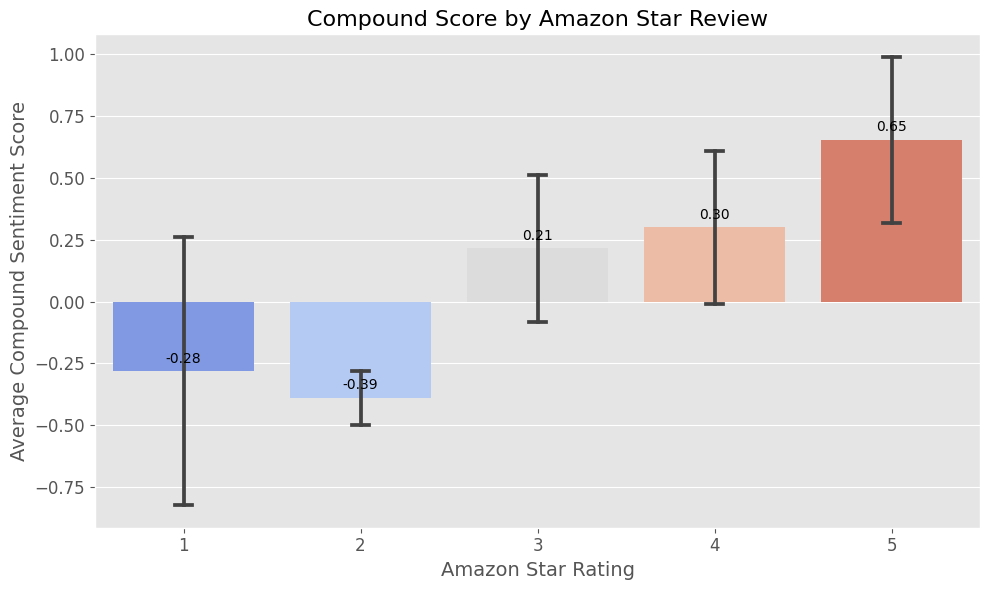

In [19]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
ax = sns.barplot(x='Rating', y='compound', data=df, ci='sd', palette='coolwarm', capsize=0.1)

# Set the title and labels for clarity
ax.set_title('Compound Score by Amazon Star Review', fontsize=16)
ax.set_xlabel('Amazon Star Rating', fontsize=14)
ax.set_ylabel('Average Compound Sentiment Score', fontsize=14)

# Improve the display of the y-axis and x-axis ticks
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Optional: Annotate each bar with the mean value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [20]:
df.compound.groupby(df.Rating).mean()

Rating
1   -0.281584
2   -0.390150
3    0.214838
4    0.300059
5    0.654207
Name: compound, dtype: float64

In [21]:
df.compound.groupby(df.Rating).min()

Rating
1   -0.9210
2   -0.5423
3    0.0000
4    0.0000
5    0.0000
Name: compound, dtype: float64

In [22]:
df.compound.groupby(df.Rating).max()

Rating
1    0.9715
2   -0.2944
3    0.8442
4    0.8625
5    0.9962
Name: compound, dtype: float64

In [25]:
df[(df['compound'] >= 0.5) & (df['Rating'] == 1)]#these are low rating with a high sentiment (why??)

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound
37,Bally Dhanoa,It was my biggest mistake to choose this colle...,1,biggest mistake choose college others canada m...,"{'neg': 0.136, 'neu': 0.583, 'pos': 0.281, 'co...",0.136,0.583,0.281,0.9715
38,Farhan Mohammed,"Well , i am here to write a different review- ...",1,well write different review anyone please tell...,"{'neg': 0.044, 'neu': 0.609, 'pos': 0.347, 'co...",0.044,0.609,0.347,0.9081
43,Ali Sheikh,All or any of these positive reviews are 100% ...,1,positive review fake successful getting pr car...,"{'neg': 0.138, 'neu': 0.587, 'pos': 0.275, 'co...",0.138,0.587,0.275,0.7579


The VADER model is not 100% accurate

In [33]:
df[(df['compound'] > 0.5) & (df['Rating'] == 1)] #comments with a 1-star rating but the model gave a overall positive sentiment


,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound
37,Bally Dhanoa,It was my biggest mistake to choose this colle...,1,biggest mistake choose college others canada m...,"{'neg': 0.136, 'neu': 0.583, 'pos': 0.281, 'co...",0.136,0.583,0.281,0.9715
38,Farhan Mohammed,"Well , i am here to write a different review- ...",1,well write different review anyone please tell...,"{'neg': 0.044, 'neu': 0.609, 'pos': 0.347, 'co...",0.044,0.609,0.347,0.9081
43,Ali Sheikh,All or any of these positive reviews are 100% ...,1,positive review fake successful getting pr car...,"{'neg': 0.138, 'neu': 0.587, 'pos': 0.275, 'co...",0.138,0.587,0.275,0.7579


In [35]:
df[(df['compound'] > 0.5) & (df['Rating'] == 2)]

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound


In [44]:
df[(df['compound'] < 0.5) & (df['Rating'] == 5)]

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound
20,Pradeep Singh,Is there anyone who is enrolled in Supply Chai...,5,anyone enrolled supply chain management course...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.0,0.839,0.161,0.3182
32,Tanveer Singh,Is there anyone in strategic merchandising ope...,5,anyone strategic merchandising operation manag...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
40,Jack Daniel,Is there any student who is in strategic merch...,5,student strategic merchandising operation mana...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
59,PARM MEHRA,Anyone for hotel and resort management in 2023...,5,anyone hotel resort management sep intake inst...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
62,Karan Randhawa,Anyone for may 2023 intake in recreation thera...,5,anyone may intake recreation therapy hit karan...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
80,Nirajan Khadka,Anyone starting from may 2023 hit me up\nBusin...,5,anyone starting may hit business analytics,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
96,A K,Learnt a lot being a student in this College♥️...,5,learnt lot student college : heartsuit : :hear...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.0,0.721,0.279,0.4767
98,jaswinder gill,Really nice place for inter nation students.,5,really nice place inter nation student,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.0,0.618,0.382,0.4754
102,SANDEEP BRAR,💟💟✌✌✌ Waiting to Attend my first class on may ...,5,: heartdecoration : :heartdecoration : :victor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
109,Sukh Chahal,It's my collage,5,collage,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


In [41]:
df[(df['compound'] > 0.5) & (df['Rating'] == 5)]

,Name,Comment,Rating,Normalized_Comment,Sentiment_Scores,neg,neu,pos,compound
1,Amal M,Lambton College in Mississauga provided me wit...,5,lambton college mississauga provided exception...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.000,0.672,0.328,0.9950
2,Jasraj Uppal,Lambton College Mississauga is simply exceptio...,5,lambton college mississauga simply exceptional...,"{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp...",0.000,0.471,0.529,0.9741
3,Rajat Sharma,It was an awesome and fruitful experience grad...,5,awesome fruitful experience graduating college...,"{'neg': 0.032, 'neu': 0.607, 'pos': 0.361, 'co...",0.032,0.607,0.361,0.9081
4,savraj singh,I am student at Lambton college it is excellen...,5,student lambton college excellent also cafeter...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.000,0.575,0.425,0.9595
5,Jass Sidhu,Lambton college is one of the best college in ...,5,lambton college one best college ontario study...,"{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...",0.000,0.611,0.389,0.9022
6,gurleen sembhi,I have studied in Toronto Campus and i must sa...,5,studied toronto campus must say college teache...,"{'neg': 0.1, 'neu': 0.593, 'pos': 0.307, 'comp...",0.100,0.593,0.307,0.9566
8,Jang Lagua-Oplado,I am a Hotel and Resort Management student and...,5,hotel resort management student past term coll...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.000,0.556,0.444,0.9781
10,Rincy Raju,Lambton college is one of the top colleges in ...,5,lambton college one top college ontario third ...,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",0.000,0.586,0.414,0.9898
11,aayushi khullar,The college ambience and staff is very good. E...,5,college ambience staff good especially evening...,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...",0.000,0.572,0.428,0.7178
12,Anirudh Bhardwaj,The college has really good staff and teaching...,5,college really good staff teaching facility ev...,"{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'comp...",0.000,0.458,0.542,0.8578


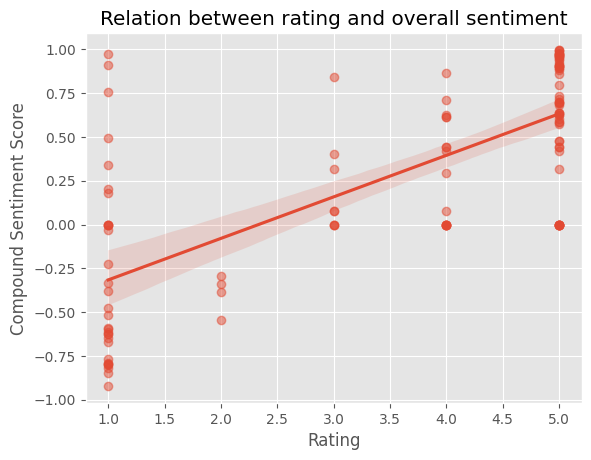

In [46]:
sns.regplot(x='Rating', y='compound', data=df, scatter_kws={'alpha':0.5})

# Set the title and labels of the plot
plt.title('Relation between rating and overall sentiment')
plt.xlabel('Rating')
plt.ylabel('Compound Sentiment Score')

# Show the plot
plt.show()